# Лабораторная работа 03. Визуализация данных

## Задание 1: Использование основных типов графиков.

Используйте набор данных о продажах автомобилей (https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) и создайте различные типы графиков, чтобы отобразить различные аспекты данных. 

In [1]:
import pandas as pd

data = pd.read_csv('car data.csv')

data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


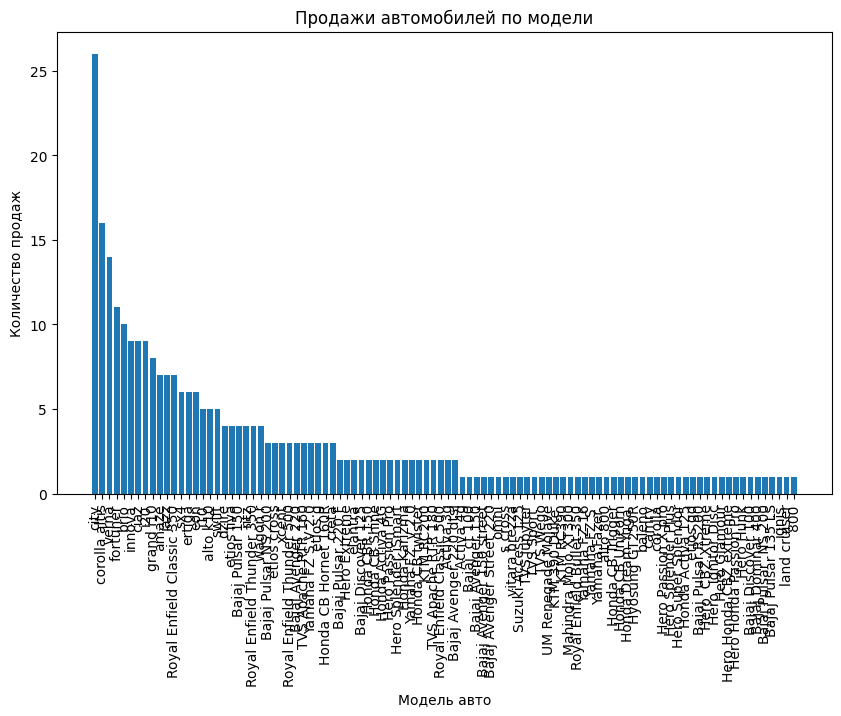

In [2]:
import matplotlib.pyplot as plt

brand_sales = data \
    .groupby('Car_Name')['Selling_Price'] \
    .count() \
    .sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(brand_sales.index, brand_sales.values)
plt.xlabel('Модель авто')
plt.ylabel('Количество продаж')
plt.title('Продажи автомобилей по модели')
plt.xticks(rotation=90)
plt.show()

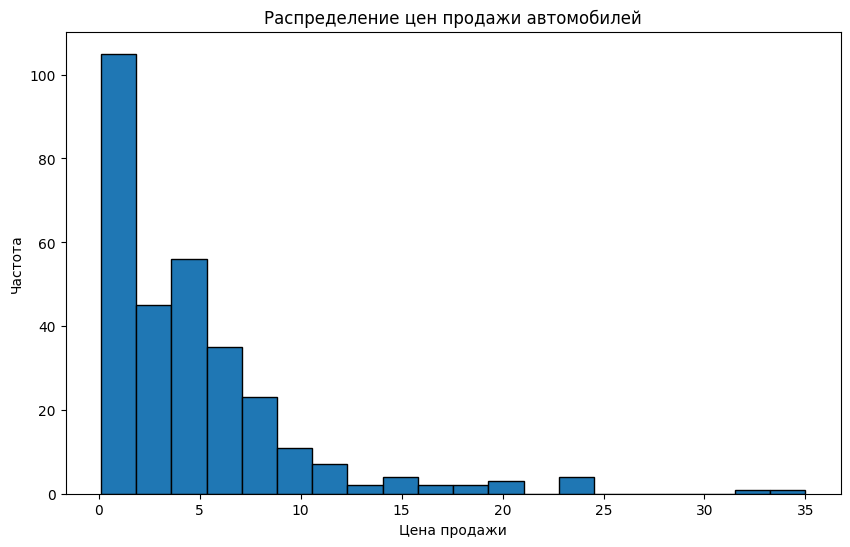

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(data['Selling_Price'], bins=20, edgecolor='black')
plt.xlabel('Цена продажи')
plt.ylabel('Частота')
plt.title('Распределение цен продажи автомобилей')
plt.show()

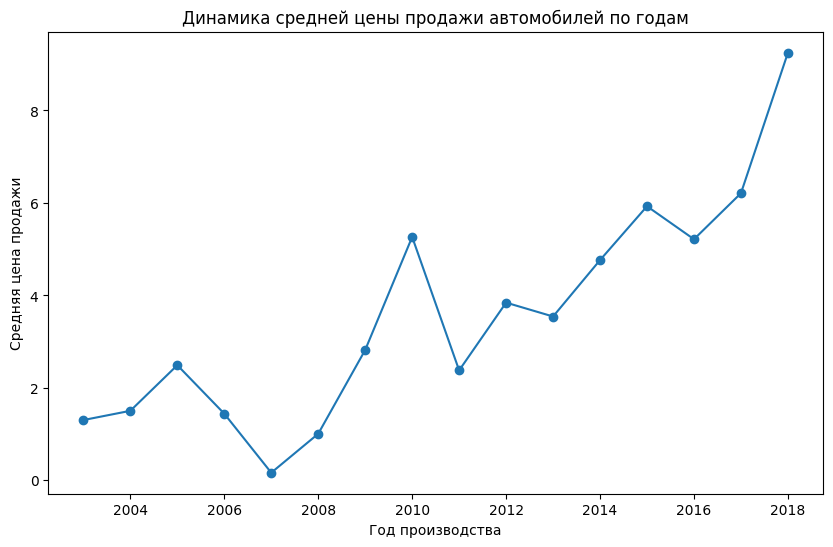

In [4]:
yearly_avg_price = data.groupby('Year')['Selling_Price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o')
plt.xlabel('Год производства')
plt.ylabel('Средняя цена продажи')
plt.title('Динамика средней цены продажи автомобилей по годам')
plt.show()

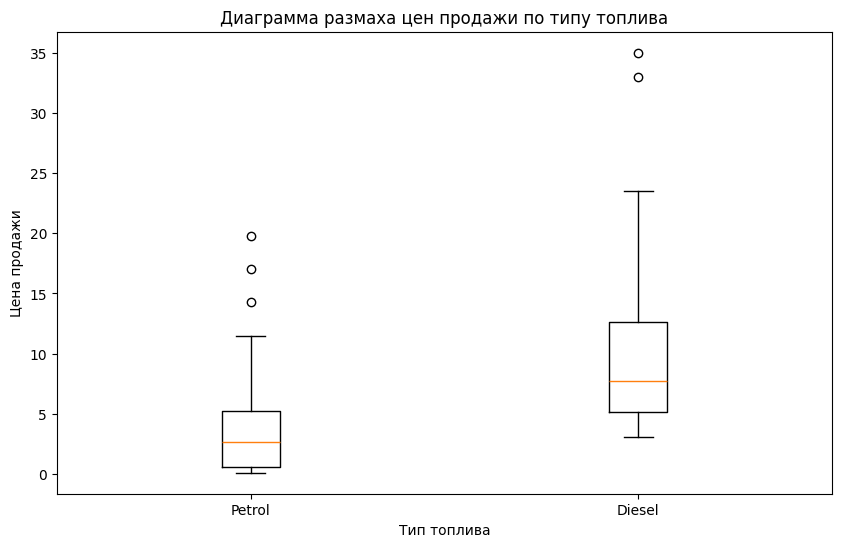

In [5]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Fuel_Type'] == 'Petrol']['Selling_Price'],
             data[data['Fuel_Type'] == 'Diesel']['Selling_Price'],
            ],
            labels=['Petrol', 'Diesel'])
plt.xlabel('Тип топлива')
plt.ylabel('Цена продажи')
plt.title('Диаграмма размаха цен продажи по типу топлива')
plt.show()

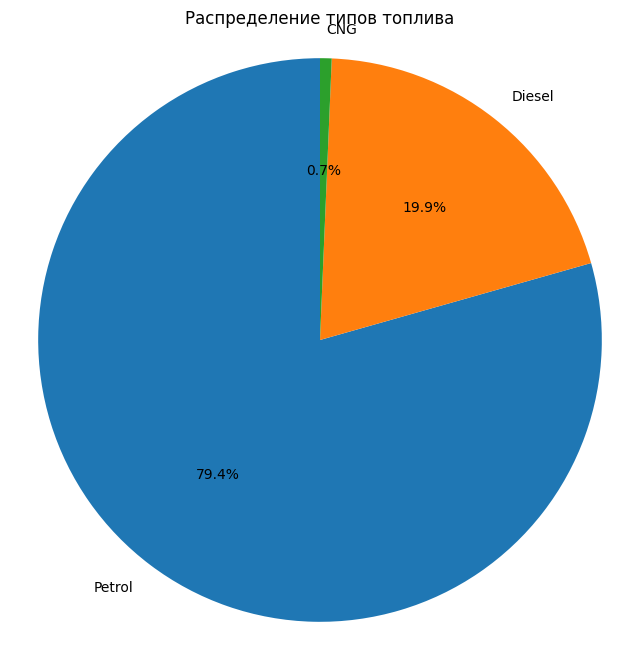

In [6]:
fuel_counts = data['Fuel_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение типов топлива')
plt.axis('equal')
plt.show()

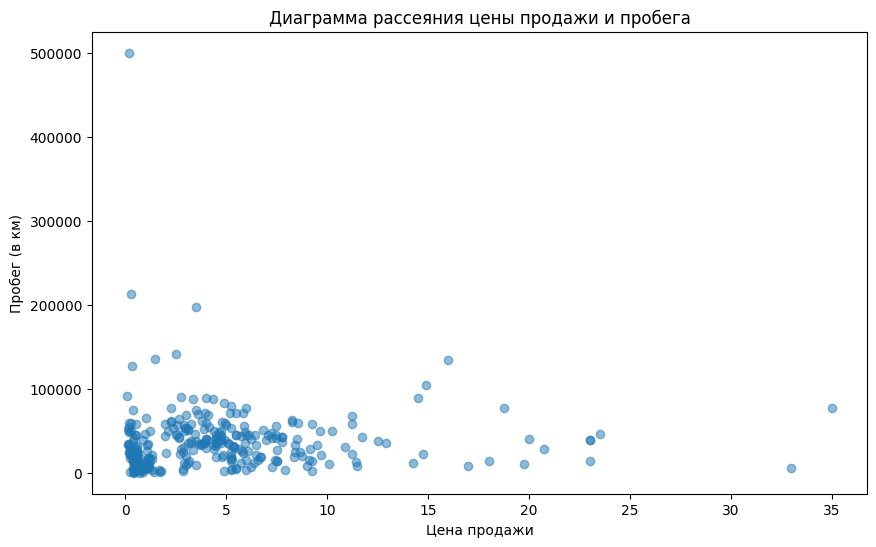

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Selling_Price'], data['Kms_Driven'], alpha=0.5)
plt.xlabel('Цена продажи')
plt.ylabel('Пробег (в км)')
plt.title('Диаграмма рассеяния цены продажи и пробега')
plt.show()

## Задание 2: Создание тепловой карты корреляции.

Используйте набор данных о погоде (https://www.kaggle.com/selfishgene/historical-hourly-weather-data) и с помощью библиотеки seaborn создайте тепловую карту, чтобы отобразить корреляцию между различными параметрами погоды.

In [8]:
data = pd.read_csv('weather_description.csv')
data

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,broken clouds,NaN,light rain,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,broken clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,broken clouds,NaN,overcast clouds,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,scattered clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,broken clouds,NaN,broken clouds,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,few clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,broken clouds,NaN,broken clouds,sky is clear,broken clouds,sky is clear,broken clouds,overcast clouds,...,few clouds,NaN,few clouds,few clouds,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,1,1,0,1
2,2,1,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
3,3,1,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4,4,1,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44455,44455,4,2,1,0,1,1,0,0,3,...,2,1,2,0,0,0,2,0,0,0
44456,44456,2,2,1,0,1,1,0,0,1,...,1,1,2,0,0,0,2,0,0,0
44457,44457,4,1,1,0,1,1,0,0,1,...,1,1,2,0,0,0,2,0,0,0
44458,44458,2,1,1,6,3,1,0,0,1,...,1,1,2,0,0,0,3,0,0,0


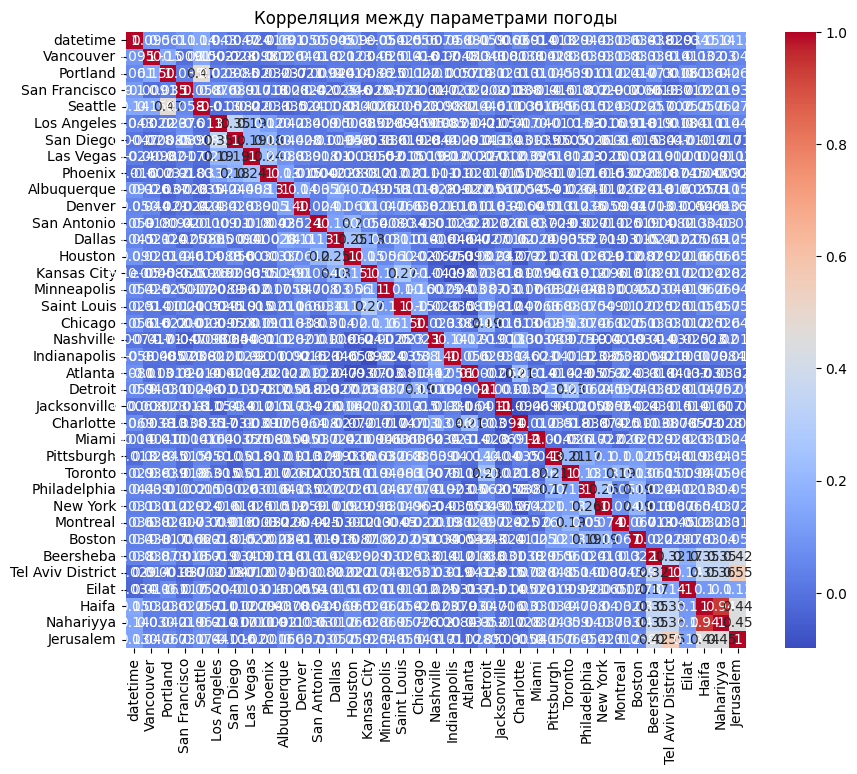

In [10]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между параметрами погоды')
plt.show()

## Задание 3: Использование plotly для создания интерактивных графиков.

Скачайте набор данных о выборах (например, https://www.kaggle.com/datasets/imoore/2020-us-general-election-turnout-rates) и используйте Plotly для создания интерактивных графиков, таких как интерактивные карты или диаграммы с подсказками.

In [11]:
data = pd.read_csv('2020 November General Election - Turnout Rates.csv')

data

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR
5,California,https://electionresults.sos.ca.gov/,Unofficial,"16,800,000",NaN,64.7%,"25,962,648","30,783,255",15.0%,"104,730",0,"102,586","207,316",NaN,CA
6,Colorado,https://results.enr.clarityelections.com/CO/10...,NaN,"3,295,000",NaN,76.4%,"4,313,054","4,595,504",5.7%,"18,905",0,0,"18,905",NaN,CO
7,Connecticut,NaN,NaN,"1,850,000",NaN,71.1%,"2,603,327","2,839,560",7.7%,"13,268",0,"4,452","17,720",NaN,CT
8,Delaware,https://elections.delaware.gov/results/html/in...,Unofficial,"507,805","502,392",70.5%,"720,531","780,822",5.8%,"5,874","14,176",350,"15,013",NaN,DE
9,District of Columbia,https://electionresults.dcboe.org/election_res...,NaN,"350,000",NaN,64.7%,"540,685","582,065",7.1%,0,0,0,0,NaN,DC


In [12]:
import plotly.express as px
import plotly.offline as offline

try:
    data = data.dropna(subset=['State', 'Total Ballots Counted (Estimate)'])
    data.reset_index(inplace=True)
except:
    pass

state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

data['State'] = data['State'].map(state_codes)

figure = px.choropleth(
    data,
    locations='State',
    hover_name='State',
    locationmode='USA-states',
    color='Total Ballots Counted (Estimate)',
    title='Ballots Counted per State',
    scope='usa'
)

offline.init_notebook_mode(connected=True)
offline.iplot(figure)

## Задание 4: Создание визуализаций временных рядов.

Возьмите набор данных о COVID-19 от Джона Хопкинса (https://github.com/CSSEGISandData/COVID-19) и создайте визуализации временных рядов для показа изменения числа случаев заражения и смертей по времени.

In [33]:
data = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
data = data.drop(['CrimeTime', 'CrimeCode', 'Location', 'Inside/Outside', 'Weapon', 'Post', 'Neighborhood', 'Location 1', 'Description', 'Total Incidents'], axis=1)
data["CrimeDate"] = pd.to_datetime(data["CrimeDate"])
data.set_index('CrimeDate', inplace=True)
data

,District
CrimeDate,
2016-11-12,CENTRAL
2016-11-12,SOUTHEASTERN
2016-11-12,NORTHEASTERN
2016-11-12,NORTHEASTERN
2016-11-12,CENTRAL
...,...
2011-01-01,NORTHEASTERN
2011-01-01,SOUTHEASTERN
2011-01-01,WESTERN


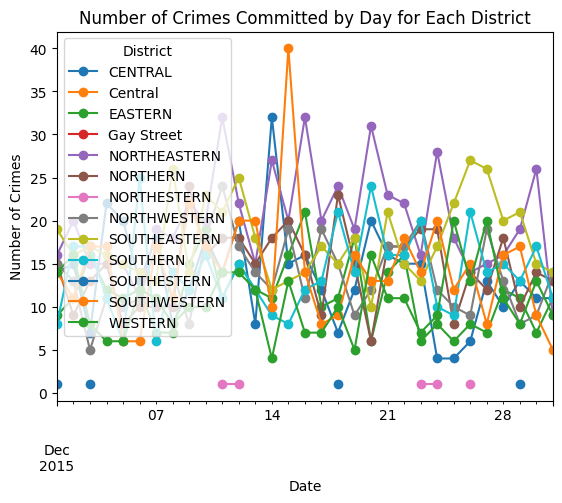

In [52]:
counts = data.groupby(["CrimeDate", "District"]).size().unstack()

counts_2015 = counts[(counts.index.year == 2015) & (counts.index.month == 12)]
                    
counts_2015.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Committed by Day for Each District')
plt.legend(title='District')
plt.show()

# Задание 5: Использование географической визуализации.

С использованием набора данных о террористических атаках (https://www.kaggle.com/START-UMD/gtd) создайте географическую визуализацию для показа, где происходят террористические атаки по миру, используя библиотеку Folium или Geopandas.

In [53]:
import pandas as pd
import folium

data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1').head(1000)

cleaned_data = data[['latitude', 'longitude', 'city', 'country_txt']]
cleaned_data = cleaned_data.dropna(subset=['latitude', 'longitude'])

map = folium.Map(location=[cleaned_data['latitude'].mean(), cleaned_data['longitude'].mean()], zoom_start=2)

for index, row in cleaned_data.iterrows():
    latitude = str(row['latitude'])
    longitude = str(row['longitude'])
    popup_text = str(row['country_txt']) + ', ' + str(row['city'])
    folium.Marker([latitude, longitude], popup=popup_text).add_to(map)

map

/tmp/ipykernel_233913/640309038.py:4: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.

